In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
pn.extension()

%matplotlib inline
df = pd.read_excel(r"C:\Users\fer1_\Downloads\BBVA.xlsx")

In [3]:
#Declaramos las nuevas columnas para el Índice
df['Cambio'] = None
df['Ganancia'] = None
df['Perdida'] = None

In [4]:
#Relleno de la columna 'Cambio'
for i in range(1,1259):
  df.loc[i,'Cambio']= df.loc[i,'Close'] - df.loc[i-1,'Close']
#Relleno columna 'Ganancia'
for i in range(1,1259):
    if df.loc[i,'Cambio']> 0:
        df.loc[i,'Ganancia']= df.loc[i,'Cambio']
    
    else :
        df.loc[i,'Ganancia']= 0
#Relleno columna 'Perdida'
for i in range(1,1259):
    if df.loc[i,'Cambio']< 0:
        df.loc[i,'Perdida']= - df.loc[i,'Cambio']
    
    else :
        df.loc[i,'Perdida']= 0 


In [5]:
#Relleno de la columna 'Prom Ganancia' ultimos 14 dias Media Movil
df['Prom Ganancia'] = df['Ganancia'].rolling(window=14).mean()

In [6]:
#Relleno de la columna 'Prom Perdida' ultimos 14 dias Media Movil
df['Prom Perdida'] = df['Perdida'].rolling(window=14).mean()

In [7]:
#Relleno de la columna 'RS'
df['RS']=df['Prom Ganancia']/df['Prom Perdida']

In [8]:
#Relleno de la columna 'RSI'
df['RSI']=100-100/(1+df['RS'])

In [9]:
#Indicador
for i in range(1,1259):
    if df.loc[i,'RSI']>70 :
        df.loc[i,'Indicador']='SobreComprado'
        
    elif df.loc[i,'RSI']<30:
        df.loc[i,'Indicador']='SobreVedido'
        
    else :
        df.loc[i,'Indicador']='Estable'
   

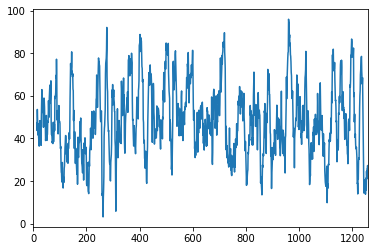

In [10]:
#Gráfica
df['RSI'].plot()

In [11]:
#A partir de aqui vamos haciendo el Dash Board

PNG(str, width=200)
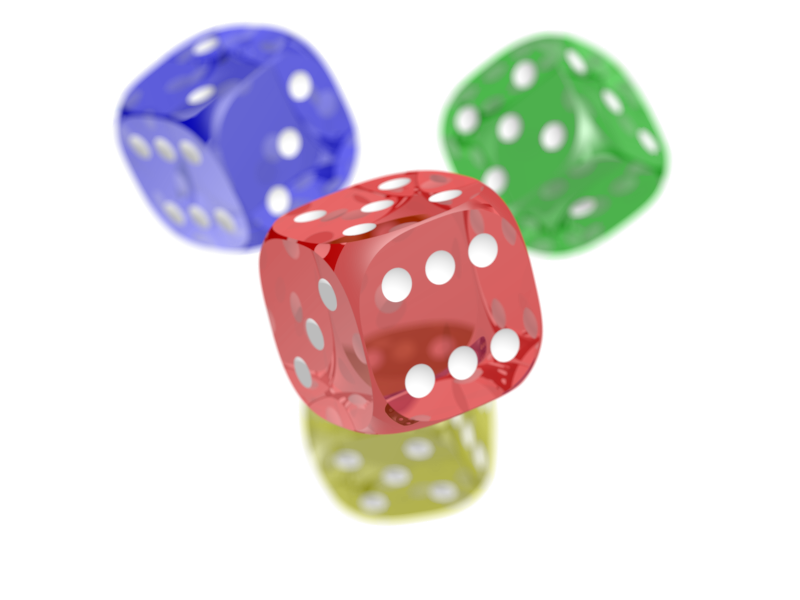

In [12]:
png = pn.panel('https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png', width=200)

png

In [13]:
string = pn.pane.Str()
widget = pn.widgets.TextInput(name='A widget', value='A string')


widget.jslink(string, value='object')

pn.Row(widget, string)

Row
    [0] TextInput(name='A widget', value='A string')
    [1] Str(Empty)

In [14]:
widget.value

'A string'

In [15]:


w4 = pn.widgets.DiscreteSlider(name='Dias a considerar', options=[1,7,14,21,28], value=14)
w3 = pn.widgets.Select(name='Empresas:',options=['BBVA', 'AMAZON', 'AMOV','TESLA','FACE BOOK','GOOGLE','PEÑOLES','GFNORTEO','ELEKTRA'])
w5 = pn.widgets.Select(name='Estrategia:',options=['Bandas de Boliiger', 'Oscilador Estocastico'])
box = pn.WidgetBox('# Elegir Activo',w3,w5, w4, )
box

WidgetBox(css_classes=['widget-box'])
    [0] Markdown(str)
    [1] Select(name='Empresas:', options=['BBVA', 'AMAZON', ...], value='BBVA')
    [2] Select(name='Estrategia:', options=['Bandas de Boliiger', ...], value='Bandas de Boliiger')
    [3] DiscreteSlider(formatter='%d', name='Dias a considerar', options=[1, 7, 14, 21, 28], value=14)

In [16]:
df

Index       Date   Open   High    Low  Close  Adj Close    Volume  \
0         0 2015-03-23  10.22  10.28  10.18  10.25   8.096692   1234000   
1         1 2015-03-24  10.33  10.42  10.30  10.36   8.183582   2098100   
2         2 2015-03-25  10.22  10.26  10.17  10.19   8.159067   3632000   
3         3 2015-03-26  10.15  10.19  10.01  10.16   8.135049   1630700   
4         4 2015-03-27  10.11  10.17  10.05  10.11   8.095012   1683900   
...     ...        ...    ...    ...    ...    ...        ...       ...   
1254   1254 2020-03-16   2.86   3.01   2.85   2.89   2.890000   9564200   
1255   1255 2020-03-17   2.97   3.15   2.91   3.12   3.120000   6146300   
1256   1256 2020-03-18   2.93   3.03   2.80   2.96   2.960000   5988900   
1257   1257 2020-03-19   2.96   3.05   2.92   3.00   3.000000   5498800   
1258   1258 2020-03-20   3.08   3.09   2.90   2.99   2.990000  10655000   

     Cambio Ganancia Perdida  Prom Ganancia  Prom Perdida        RS  \
0      None     None    None            NaN           NaN       NaN   
1      0.11     0.11       0            NaN           NaN       NaN   
2     -0.17        0    0.17            NaN           NaN       NaN   
3     -0.03        0    0.03            NaN           NaN       NaN   
4     -0.05        0    0.05            NaN           NaN       NaN   
...     ...      ...     ...            ...           ...       ...   
1254  -0.76        0    0.76       0.056429      0.212143  0.265993   
1255   0.23     0.23       0       0.072857      0.210714  0.345763   
1256  -0.16        0    0.16       0.072857      0.210714  0.345763   
1257   0.04     0.04       0       0.075714      0.201429  0.375887   
1258  -0.01        0    0.01       0.067857      0.202143  0.335689   

            RSI    Indicador  
0           NaN          NaN  
1           NaN      Estable  
2           NaN      Estable  
3           NaN      Estable  
4           NaN      Estable  
...         ...          ...  
1254  21.010638  SobreVedido  
1255  25.692695  SobreVedido  
1256  25.692695  SobreVedido  
1257  27.319588  SobreVedido  
1258  25.132275  SobreVedido  

[1259 rows x 16 columns]